In [113]:
import numpy
import pandas
import missingno
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

games = pandas.read_csv("vgsales.csv")
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Data Exploration & Cleaning

### Column data types

Rank - [Integer][Continuous]

Name - [String][Qualitative]

Platform -[String][Categorical]

Year - [Integer][Categorical]

Genre - [String][Categorical]

Publisher - [String][Categorical]

NA_Sales - [Double][Continuous]

EU_Sales - [Double][Continuous]

JP_Sales - [Double][Continuous]

Other_Sales - [Double][Continuous]

Global_Sales - [Double][Continuous]

### Identifying any present null values

In [3]:
games.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

### A visualisation to represent the missing values in the dataset

<AxesSubplot:>

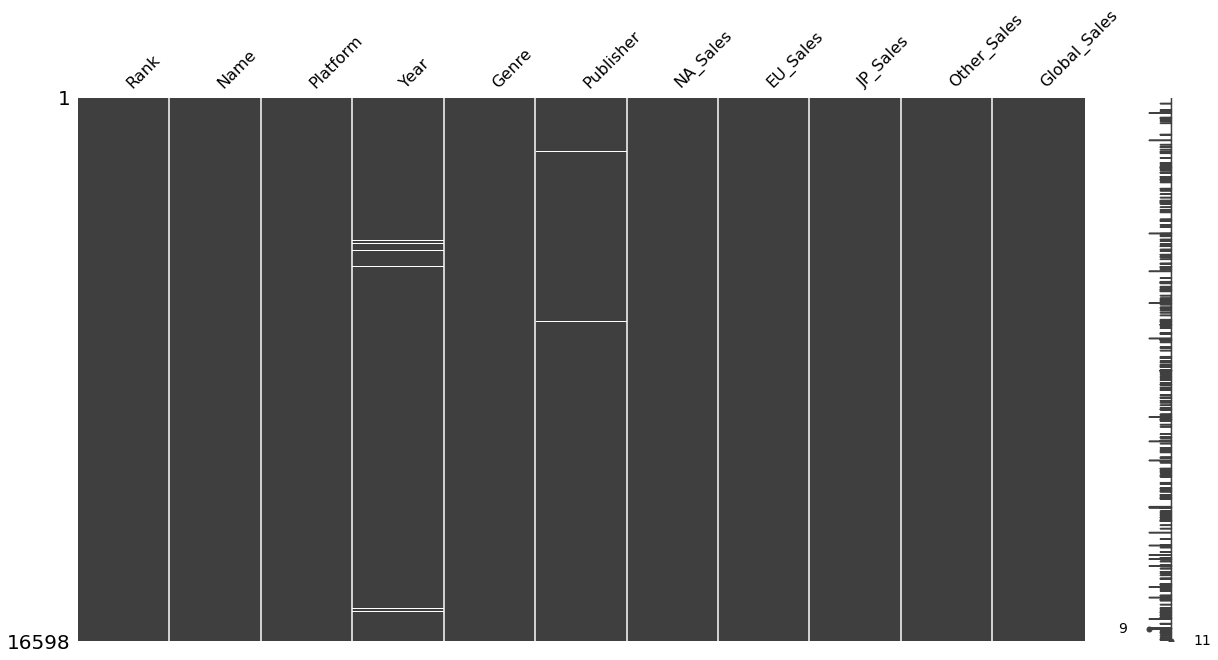

In [5]:
missingno.matrix(games, figsize = (20,10))

In [8]:
# Establishing the number of records in the dataset

games["Count"] = 1
games["Count"].sum()

16598

In [2]:
games.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


### Observations

Average year is 2006 in a dataset consisting of video game sales made between 1980 and 2020. Within a span of 40 years, the spread of the data reveals that more sales were made after the year 2000 as opposed to the years before. One might assume that the popularity of games released increased due to newer and better gaming consoles and game features. Attributed to the average may be the release of the PlayStation 2 gaming console being released in 2000 and the PlayStation 3 console being released in the year 2006. 

The data is skewed to the left, indicating that more sales have been made in the 21st century as opposed to the 20th century. The rise in popularity of video games began in the late 1990's and propelled sales into the 21st century. 

In [3]:
games.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [125]:
subset = games[['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Global_Sales']]

subset

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,31.37
...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.01


In [3]:
subset["Genre"].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

In [18]:
games.loc[(games["EU_Sales"] == 0) & (games["NA_Sales"] == 0) & (games["JP_Sales"] == 0) & (games["Other_Sales"] == 0) & (games["Global_Sales"] == 0)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


Above code acts as a check to identify any video games with no recorded sales. No video games are found with zero sales.

In [27]:
subset.loc[subset["Other_Sales"] == 0]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
137,World of Warcraft,PC,2004.0,Role-Playing,Activision,0.07,6.21,0.00,0.0,6.28
214,Monster Hunter Freedom 3,PSP,2010.0,Role-Playing,Capcom,0.00,0.00,4.87,0.0,4.87
281,Half-Life,PC,1997.0,Shooter,Vivendi Games,4.03,0.00,0.09,0.0,4.12
288,World of Warcraft: The Burning Crusade,PC,2007.0,Role-Playing,Activision,2.57,1.52,0.00,0.0,4.09
312,Dragon Warrior III,NES,1988.0,Role-Playing,Enix Corporation,0.10,0.00,3.77,0.0,3.87
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.0,0.01
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.0,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.0,0.01
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.0,0.01


### Removing redundant and/or irrelevant columns

Due to the broadness of the column "Other_Sales", the column will be removed from the dataset. In a world of seven continents and one hundred and ninety-six countries, sales cannot be guessed as to where they are from. No valuable information, without additional context, can be extracted from the column and will therefore be removed from the dataset. It cannot be determined whether other sales took place in other European, Asian or African countries. 

In [28]:
subset.drop(["Other_Sales"], axis = 1)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,31.37
...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.01


In [35]:
subset["Name"].value_counts()

Need for Speed: Most Wanted                12
Ratatouille                                 9
FIFA 14                                     9
LEGO Marvel Super Heroes                    9
Madden NFL 07                               9
                                           ..
Ar tonelico Qoga: Knell of Ar Ciel          1
Galaga: Destination Earth                   1
Nintendo Presents: Crossword Collection     1
TrackMania: Build to Race                   1
Know How 2                                  1
Name: Name, Length: 11493, dtype: int64

In [37]:
subset.loc[subset["Name"] == "Need for Speed: Most Wanted"]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
252,Need for Speed: Most Wanted,PS2,2005.0,Racing,Electronic Arts,2.03,1.79,0.08,0.47,4.37
498,Need for Speed: Most Wanted,PS3,2012.0,Racing,Electronic Arts,0.71,1.51,0.06,0.61,2.89
1173,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.80,0.01,0.15,1.58
1530,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1.00,0.17,0.02,0.10,1.29
1742,Need for Speed: Most Wanted,PSV,2012.0,Racing,Electronic Arts,0.38,0.52,0.01,0.25,1.16
2005,Need for Speed: Most Wanted,XB,2005.0,Racing,Electronic Arts,0.53,0.46,0.00,0.05,1.04
3585,Need for Speed: Most Wanted,GC,2005.0,Racing,Electronic Arts,0.43,0.11,0.00,0.02,0.56
5900,Need for Speed: Most Wanted,PC,2005.0,Racing,Electronic Arts,0.02,0.23,0.00,0.05,0.30
6149,Need for Speed: Most Wanted,WiiU,2013.0,Racing,Electronic Arts,0.14,0.12,0.00,0.02,0.28
6278,Need for Speed: Most Wanted,DS,2005.0,Racing,Electronic Arts,0.24,0.01,0.00,0.02,0.27


Certain video game titles appear to repeat in the dataset. This is understandable as the titles were released on multiple different platforms that needed to be recorded. The years however differ based on the console the title is released on. The multiple occurrence of the titles does however provide the first year that the sales of the specific title were recorded which may be assumed to be the year of release.

### Grouping the data 

Grouping data based on a specific criteria makes for better inferences. Inferences such as the previously mentioned spread of the data indicating the rise in popularity of video games after the year 2000. 

In [51]:
subset.groupby("Year")["Global_Sales"].sum().sort_values(ascending = False)

Year
2008.0    678.90
2009.0    667.30
2007.0    611.13
2010.0    600.45
2006.0    521.04
2011.0    515.99
2005.0    459.94
2004.0    419.31
2002.0    395.52
2013.0    368.11
2012.0    363.54
2003.0    357.85
2014.0    337.05
2001.0    331.47
2015.0    264.44
1998.0    256.47
1999.0    251.27
2000.0    201.56
1997.0    200.98
1996.0    199.15
1995.0     88.11
1994.0     79.17
1992.0     76.16
1989.0     73.45
2016.0     70.93
1985.0     53.94
1984.0     50.36
1990.0     49.39
1988.0     47.22
1993.0     45.98
1986.0     37.07
1981.0     35.77
1991.0     32.23
1982.0     28.86
1987.0     21.74
1983.0     16.79
1980.0     11.38
2020.0      0.29
2017.0      0.05
Name: Global_Sales, dtype: float64

Video game sales suffer a significant loss after 2015. Sales decrease by 194 in the year 2016 and continue to drop leading up to the final year in 2020. Two years appear to be missing from the dataset as well, (2018 and 2019), which may be a result of poor data collection. The poor data collection may have seemingly affected the years after 2016 or perhaps 2016 itself and explain the lowered number of recorded sales after the year 2015. 

In [55]:
subset.groupby("Year")["Global_Sales"].agg(["mean", "max"]).sort_values(by = "Year", ascending = False)

,mean,max
Year,,
2020.0,0.290000,0.29
2017.0,0.016667,0.03
2016.0,0.206192,4.77
2015.0,0.430684,14.24
2014.0,0.579124,11.98
2013.0,0.674194,21.40
2012.0,0.553333,14.03
2011.0,0.453020,14.76
2010.0,0.476926,21.82


In [62]:
platform_sales = subset.groupby("Platform")["Global_Sales"].sum().sort_values(ascending = False)
platform_sales

Platform
PS2     1255.64
X360     979.96
PS3      957.84
Wii      926.71
DS       822.49
PS       730.66
GBA      318.50
PSP      296.28
PS4      278.10
PC       258.82
XB       258.26
GB       255.45
NES      251.07
3DS      247.46
N64      218.88
SNES     200.05
GC       199.36
XOne     141.06
2600      97.08
WiiU      81.86
PSV       61.93
SAT       33.59
GEN       28.36
DC        15.97
SCD        1.87
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: Global_Sales, dtype: float64

In [64]:
platform_sales.nlargest(n = 5)

Platform
PS2     1255.64
X360     979.96
PS3      957.84
Wii      926.71
DS       822.49
Name: Global_Sales, dtype: float64

Having grouped the data by global sales and the platform the titles have been published on, the top five highest performing platforms in terms of Sales are PlayStation 2, XBox 360, PlayStation 3, Nintendo Wii and Nintendo DS. 

Based on the output, it is safe to assume that PlayStation is the global favourite, in terms of platforms to play on, based on the number of video game sales that have been made for the specific consoles. Both the Sony PlayStation and Nintendo gaming platforms dominate the top sellers with XBox only appearing in the top ten global sales group once. 

In [74]:
eu_sales = subset.groupby("Publisher")["EU_Sales"].sum().sort_values(ascending = False).nlargest(n = 5)
na_sales = subset.groupby("Publisher")["NA_Sales"].sum().sort_values(ascending = False).nlargest(n = 5)
jp_sales = subset.groupby("Publisher")["JP_Sales"].sum().sort_values(ascending = False).nlargest(n = 5)

print(eu_sales)
print()
print(na_sales)
print()
print(jp_sales)

Publisher
Nintendo                       418.74
Electronic Arts                371.27
Activision                     215.53
Sony Computer Entertainment    187.72
Ubisoft                        163.32
Name: EU_Sales, dtype: float64

Publisher
Nintendo                       816.87
Electronic Arts                595.07
Activision                     429.70
Sony Computer Entertainment    265.22
Ubisoft                        253.43
Name: NA_Sales, dtype: float64

Publisher
Nintendo                        455.42
Namco Bandai Games              127.07
Konami Digital Entertainment     91.30
Sony Computer Entertainment      74.10
Capcom                           68.08
Name: JP_Sales, dtype: float64


In [86]:
subset.groupby("Genre")["NA_Sales"].sum()

Genre
Action          877.83
Adventure       105.80
Fighting        223.59
Misc            410.24
Platform        447.05
Puzzle          123.78
Racing          359.42
Role-Playing    327.28
Shooter         582.60
Simulation      183.31
Sports          683.35
Strategy         68.70
Name: NA_Sales, dtype: float64

In [88]:
subset.groupby("Genre")["EU_Sales"].sum()

Genre
Action          525.00
Adventure        64.13
Fighting        101.32
Misc            215.98
Platform        201.63
Puzzle           50.78
Racing          238.39
Role-Playing    188.06
Shooter         313.27
Simulation      113.38
Sports          376.85
Strategy         45.34
Name: EU_Sales, dtype: float64

In [90]:
subset.groupby("Genre")["JP_Sales"].sum()

Genre
Action          159.95
Adventure        52.07
Fighting         87.35
Misc            107.76
Platform        130.77
Puzzle           57.31
Racing           56.69
Role-Playing    352.31
Shooter          38.28
Simulation       63.70
Sports          135.37
Strategy         49.46
Name: JP_Sales, dtype: float64

Across the entire dataset, it is clear to see that video games of the action genre record more sales than any other genre and as it appears, by a very large number across the board. It is safe to assume that action video games are favoured over any other genre based on the sales recorded. The top three, which consistently remain in the top three in all categories, include Action, Adventure and Fighting. The gaming community very clearly has bias towards violent video games! 

### Identifying the best performing title across the globe

In [92]:
title_sales = subset.groupby("Name")["Global_Sales"].sum().nlargest(n = 10)
title_sales

Name
Wii Sports                        82.74
Grand Theft Auto V                55.92
Super Mario Bros.                 45.31
Tetris                            35.84
Mario Kart Wii                    35.82
Wii Sports Resort                 33.00
Pokemon Red/Pokemon Blue          31.37
Call of Duty: Black Ops           31.03
Call of Duty: Modern Warfare 3    30.83
New Super Mario Bros.             30.01
Name: Global_Sales, dtype: float64

Wii Sports is evidently the best performing title in the world in terms of global sales and revealed above with Grand Theft Auto V and Super Mario Bros. making an appearance in second and third respectively. Grand Theft Auto V (GTA V) is a video game that has won a multitude of awards since the title's release including "Game of the Year" award in 2013 firmly establishing its position in second place in terms of sales.

# Visualisations

### Charts and Graphs

### Top Five Publisher sales in Europe

([<matplotlib.patches.Wedge at 0x193207fe9d0>,
 [Text(-0.21994254989393816, 1.1796716809121734, 'Nintendo'),
  Text(-0.9937929297630841, -0.4715671879519461, 'Electronic Arts'),
  Text(0.25203481537888933, -1.0707373402646092, 'Activision'),
  Text(1.010680113722108, -0.4341954717942912, 'Sony'),
  Text(1.0100661308463694, 0.43562186735406766, 'Ubisoft')],
 [Text(-0.12829982077146393, 0.6881418138654344, '30.9%'),
  Text(-0.542068870779864, -0.2572184661556069, '27.4%'),
  Text(0.13747353566121234, -0.5840385492352412, '15.9%'),
  Text(0.5512800620302406, -0.236833893705977, '13.8%'),
  Text(0.5509451622798378, 0.23761192764767325, '12.0%')])

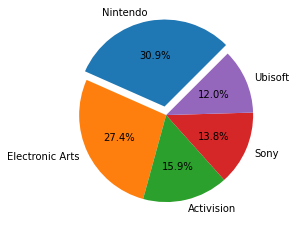

In [84]:
explode = (0.1, 0, 0, 0, 0)
labels = "Nintendo", "Electronic Arts", "Activision", "Sony", "Ubisoft"
plt.pie(eu_sales, explode = explode, labels = labels, autopct = '%1.1f%%', startangle = 45)

### Top Five Publisher sales in North America

([<matplotlib.patches.Wedge at 0x19320747af0>,
 [Text(-0.35676974543938406, 1.1457379057791173, 'Nintendo'),
  Text(-0.9013632723988778, -0.6305111031301404, 'Electronic Arts'),
  Text(0.43199347420083933, -1.0116232689335931, 'Activision'),
  Text(1.0678793923425092, -0.2638817981790216, 'Sony'),
  Text(0.9914094538993536, 0.47655775591106025, 'Ubisoft')],
 [Text(-0.20811568483964066, 0.668347111704485, '34.6%'),
  Text(-0.49165269403575146, -0.3439151471618947, '25.2%'),
  Text(0.2356328041095487, -0.5517945103274143, '18.2%'),
  Text(0.5824796685504594, -0.1439355262794663, '11.2%'),
  Text(0.540768793036011, 0.25994059413330556, '10.7%')])

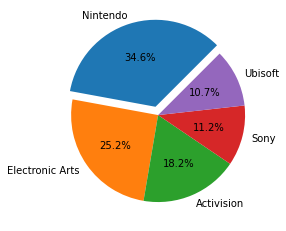

In [82]:
explode = (0.1, 0, 0, 0, 0)
labels = "Nintendo", "Electronic Arts", "Activision", "Sony", "Ubisoft"
plt.pie(na_sales, explode = explode, labels = labels, autopct = '%1.1f%%', startangle = 45)

### Top Five Publisher sales in Japan

([<matplotlib.patches.Wedge at 0x193207a8220>,
 [Text(-0.9885241084836613, 0.6803088173370847, 'Nintendo'),
  Text(0.0759501026172172, -1.0973748593404327, 'Namco Bandai'),
  Text(0.8683555444972475, -0.6752471016901065, 'Konami'),
  Text(1.09967976422982, -0.026540839162465087, 'Sony'),
  Text(0.9528024032207865, 0.5496977173107909, 'Capcom')],
 [Text(-0.5766390632821358, 0.3968468101132994, '55.8%'),
  Text(0.04142732870030028, -0.5985681050947814, '15.6%'),
  Text(0.4736484788166804, -0.36831660092187624, '11.2%'),
  Text(0.5998253259435381, -0.01447682136134459, '9.1%'),
  Text(0.5197104017567925, 0.29983511853315864, '8.3%')])

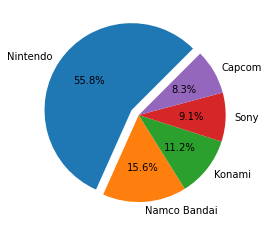

In [83]:
explode = (0.1, 0, 0, 0, 0)
labels = "Nintendo", "Namco Bandai", "Konami", "Sony", "Capcom"
plt.pie(jp_sales, explode = explode, labels = labels, autopct = '%1.1f%%', startangle = 45)

### Performance of Platform based on sales

<AxesSubplot:xlabel='count', ylabel='Platform'>

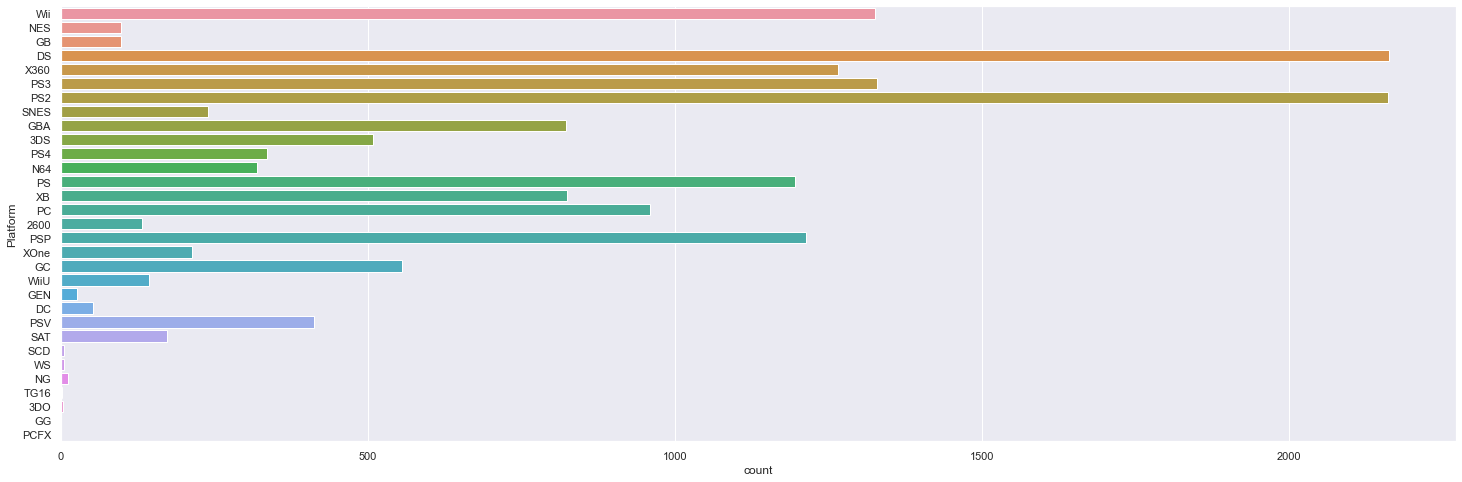

In [111]:
sns.countplot(y = "Platform", data = subset)

### Sales based on Genre in Japan

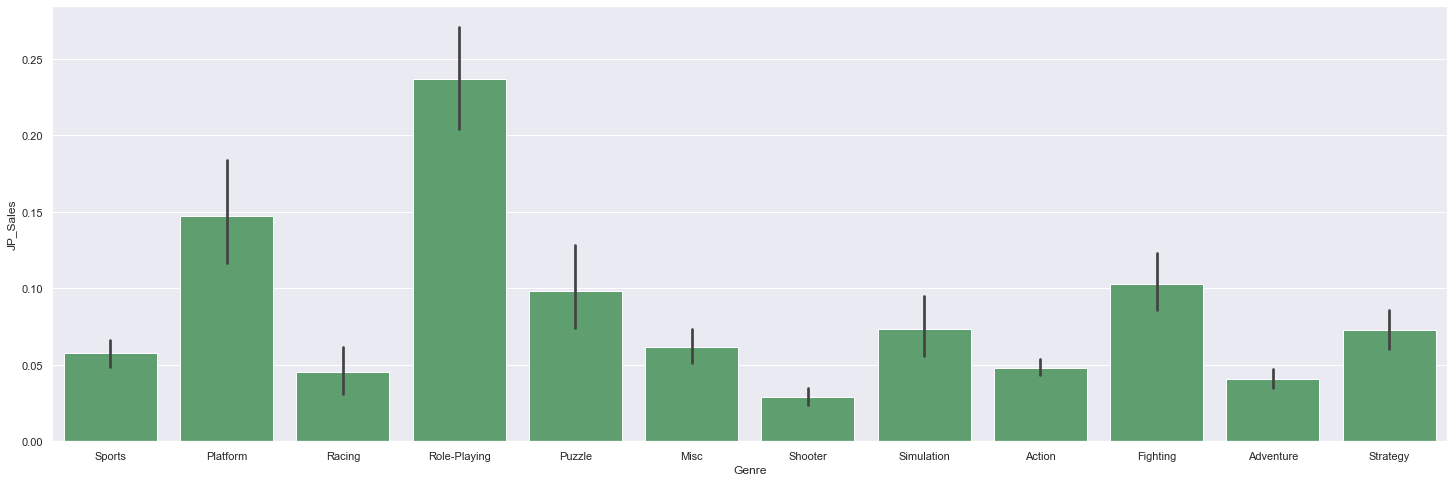

In [115]:
sns.barplot(x = "Genre", y = "JP_Sales", data = subset, label = "Total", color = "g")
sns.set(rc = {'figure.figsize':(25,8)})

Based on the graph above, Role-Playing is a popular genre in video games based on the sales made in Japan.

### Word Cloud

In [114]:
stopwords = STOPWORDS

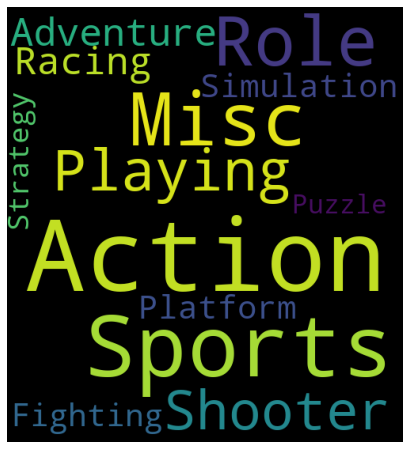

In [120]:
cloud = WordCloud(background_color = "black", stopwords = stopwords, height = 550, width = 500, collocations = False)

# Concatenating all genres in the "Genre" column
cloud.generate(" ".join(subset["Genre"]))
plt.imshow(cloud)
plt.axis("off")
plt.show()

Word Cloud representation of the most popular genres in terms of sales made.

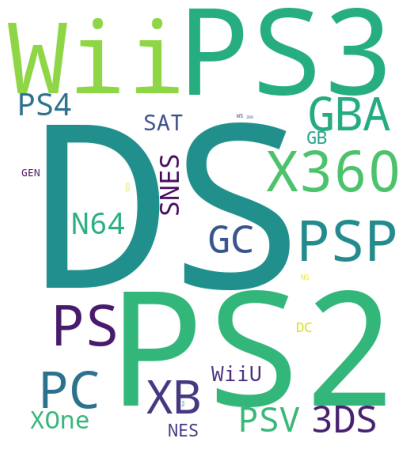

In [123]:
cloud = WordCloud(background_color = "white", stopwords = stopwords, height = 550, width = 500, collocations = False)

# Concatenating all publishers in the "Publisher" column
cloud.generate(" ".join(subset["Platform"]))
plt.imshow(cloud)
plt.axis("off")
plt.show()

Word Cloud representation of the most popular platforms based on sales.